In [1]:
import numpy as np
import pandas as pd
import json
import matplotlib.pyplot as plt

In [2]:
import warnings 
warnings.filterwarnings('ignore')

In [3]:
with open('kym.json', 'r', encoding='utf-8') as reader:
    memes = json.load(reader)

#### Total number of meme entries in the raw data file

In [4]:
len(memes)

28799

#### Example of meme entry</font>

In [5]:
print(json.dumps(memes[1], indent=4))

{
    "title": "ROFLcopter",
    "url": "https://knowyourmeme.com/memes/roflcopter",
    "last_update_source": 1591400337,
    "category": "Meme",
    "template_image_url": "https://i.kym-cdn.com/entries/icons/original/000/000/023/roflcopter-2.jpg",
    "meta": {
        "og:title": "ROFLcopter",
        "og:site_name": "Know Your Meme",
        "og:image": "https://i.kym-cdn.com/entries/icons/facebook/000/000/023/roflcopter-2.jpg",
        "og:image:width": "600",
        "og:image:height": "315",
        "og:type": "article",
        "fb:app_id": "104675392961482",
        "fb:pages": "88519108736",
        "article:publisher": "https://www.facebook.com/knowyourmeme",
        "twitter:card": "summary_large_image",
        "twitter:site": "@knowyourmeme",
        "twitter:creator": "@knowyourmeme",
        "twitter:title": "ROFLcopter",
        "twitter:description": "An ASCII helicopter becomes an Internet meme. soisoisoisoi",
        "twitter:image": "https://i.kym-cdn.com/entries/i

#### Total number of distinct meme entries (by title)

In [6]:
unique_titles = set([meme['title'] for meme in memes])
print(len(unique_titles))

16713


**Around 58% meme entries are unique**. Same goes for URLs.

### Meme categories

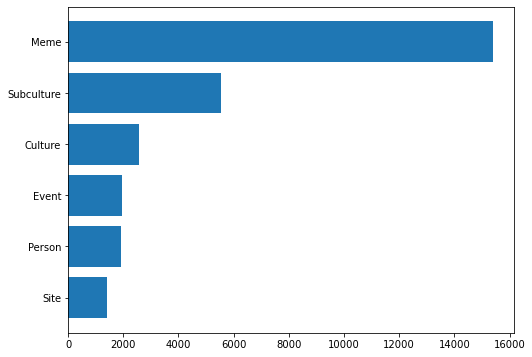

In [7]:
categories = [meme['category'] for meme in memes]
categories_counter = {}
for cat in categories:
    if cat not in categories_counter:
        categories_counter[cat] = 0
        
    categories_counter[cat] += 1
    
categories_counter = dict(sorted(categories_counter.items(), key=lambda item: item[1], reverse=True))
  
fig, ax = plt.subplots(figsize=(8, 6))
bars = ax.barh(np.arange(len(categories_counter.keys())), categories_counter.values(), tick_label=list(categories_counter.keys()));
#ax.bar_label(bars, padding=3.)
ax.invert_yaxis();

### Details Attribute Breakdown

#### Status

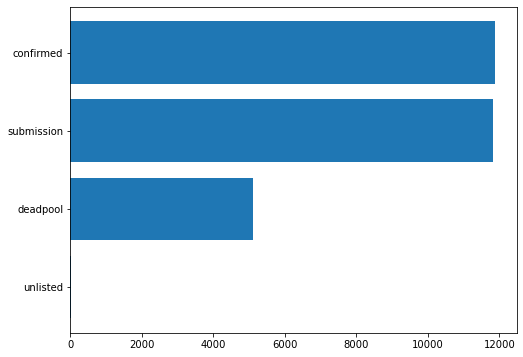

In [8]:
status = [meme['details']['status'] for meme in memes]
status_counter = {}
for st in status:
    if st not in status_counter:
        status_counter[st] = 0
        
    status_counter[st] += 1
    
status_counter = dict(sorted(status_counter.items(), key=lambda item: item[1], reverse=True))
  
fig, ax = plt.subplots(figsize=(8, 6))
bars = ax.barh(np.arange(len(status_counter.keys())), status_counter.values(), tick_label=list(status_counter.keys()));
#ax.bar_label(bars, padding=3.)
ax.invert_yaxis();

Status refers to the submission status of a meme to KYM site by a registered member.

* **confirmed**: the submission is reviewed and approved
* **submission**: the submission is currenly beeing researched and evaluated
* **deadpool**: the submission has been rejected due to incompliteness or lack of notability
* **unlisted**: didn't find any description; 5/6 entries refer to the same [meme page](https://knowyourmeme.com/memes/spurdo-sparde) (marked as sensitive)

**Suggestion**: *keep only meme entries having confirmed status*

#### Origin

In [9]:
from collections import Counter

origin = [meme['details']['origin'] for meme in memes]
origin_counter = Counter()
for orig in origin:
    origin_counter[orig] += 1
    
print('Total number of origin sources:', len(origin_counter))
print('\nTop 10 most frequent origin sources:')
for orig, cnt in origin_counter.most_common(10):
    print(f'{orig:<15}: {cnt:>4}')

Total number of origin sources: 6667

Top 10 most frequent origin sources:
Unknown        : 4141
YouTube        : 1774
4chan          : 1382
Twitter        :  895
ARPANET        :  556
Tumblr         :  554
Reddit         :  478
Facebook       :  457
France         :  358
United States  :  338


#### Type

The full list of types and categories available [here](https://knowyourmeme.com/categories)

Total number of types: 111

Top 10 most frequent types:
company        : 1246
video-game     : 1172
image-macro    :  961
slang          :  715
tv-show        :  709
exploitable    :  703
art            :  697
catchphrase    :  681
technology     :  639
viral-video    :  616


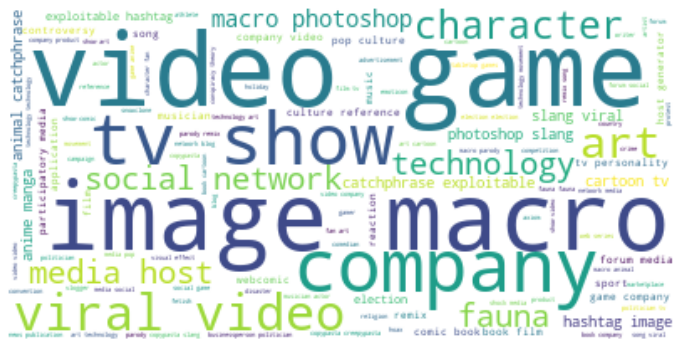

In [10]:
from wordcloud import WordCloud


types = []
for meme in memes:
    try:
        t = meme['details']['type']
        if len(t) > 1:
            for tt in t:
                types.append(tt.split('/')[-1])
        else:
            types.append(t[0].split('/')[-1])
    except KeyError:
        pass

type_counter = Counter()
for t in types:
    type_counter[t] += 1
    
print('Total number of types:', len(type_counter))
print('\nTop 10 most frequent types:')
for t, cnt in type_counter.most_common(10):
    print(f'{t:<15}: {cnt:>4}')
    
    
text = ' '.join(t for t in types)
wordcloud = WordCloud(max_words=len(types), background_color="white").generate(text)
plt.figure(figsize=(12, 12))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off');

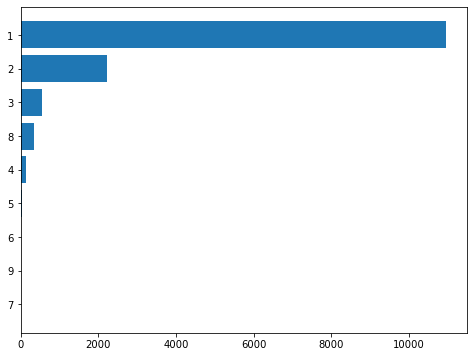

In [11]:
t_len = []
for meme in memes:
    try:
        t = meme['details']['type']
        t_len.append(len(t))
    except KeyError:
        pass
    
    
tlen_counter = {}
for tl in t_len:
    if tl not in tlen_counter:
        tlen_counter[tl] = 0
        
    tlen_counter[tl] += 1
    
tlen_counter = dict(sorted(tlen_counter.items(), key=lambda item: item[1], reverse=True))
  
fig, ax = plt.subplots(figsize=(8, 6))
bars = ax.barh(np.arange(len(tlen_counter.keys())), tlen_counter.values(), tick_label=list(tlen_counter.keys()));
#ax.bar_label(bars, padding=3.)
ax.invert_yaxis();

Meme entries come from 111 various types. Most of the entries feature only one type, but others might have up to 9 types.

There are quite a few types implying *sensitive content* of the meme entry like
* crime
* disaster
* exploitable
* fetish
* religion

**Suggestion**: *filter out meme entries of types listed above.*

#### Year

In [12]:
year = [meme['details']['year'] for meme in memes]
year_counter = Counter()
for y in year:
    try:
        year_counter[int(y)] += 1
    except:
        year_counter[y] += 1
    
print('Total number of year values:', len(year_counter)-1)
print('\nTop 10 most frequent year values:')
for y, cnt in year_counter.most_common(10):
    if y:
        print(f'{y:<5}: {cnt:>4}')

Total number of year values: 189

Top 10 most frequent year values:
2011 : 2283
2010 : 1818
2012 : 1732
2016 : 1432
2013 : 1186
2006 : 1118
2015 : 1109
2014 : 1069
2009 : 1056


In [13]:
print('The latest emerged meme:', np.max([y for y in year_counter.keys() if y]))

The latest emerged meme: 2916


In [14]:
print('The earliest emerged meme:', np.min([y for y in year_counter.keys() if y]))

The earliest emerged meme: 1000


* **3,177 meme entries lack year information**
* some memes are coming ahead of time (one goes as far as 2916)
* other memes dates back to medieval times (as early as 11th century)
* in fact, the concept of Internet meme was introduced back in 1993 (look [here](https://en.wikipedia.org/wiki/Internet_meme#:~:text=Internet%20memes%20grew%20as%20a%20concept%20in%20the%20mid-1990s.%20At%20the%20time%2C%20memes%20were%20just%20short%20clips%20that%20were%20shared%20between%20people%20in%20Usenet%20forums.%5Bcitation%20needed%5D))

**Suggestion**: *fix time frame for all meme entries between 1993 to 2021; those going outside should be removed*

### Added

Timestamp of first submission to KYM site

In [15]:
from datetime import datetime

added_dt = []
for meme in memes:
    try:
        added_dt.append(datetime.fromtimestamp(meme['added']))
    except KeyError:
        pass
    
added_year = [dt_obj.year for dt_obj in added_dt]
print('Total number of submission year values:', len(np.unique(added_year)))

print('The earliest submitted meme:', np.min(added_year))
print('The latest submitted meme:', np.max(added_year))

Total number of submission year values: 14
The earliest submitted meme: 2008
The latest submitted meme: 2021


### Tags

Total number of tags: 31000

Top 10 most frequent tags:
4chan          : 1036
youtube        :  948
meme           :  867
image macro    :  709
slang          :  682
catchphrase    :  594
twitter        :  489
japan          :  478
exploitable    :  473
tumblr         :  461


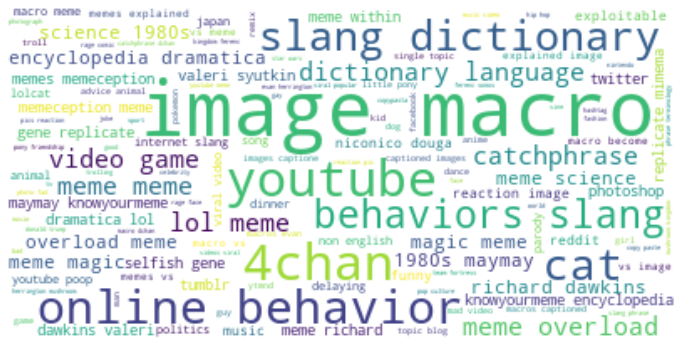

In [16]:
tags = []

for meme in memes:
    try:
        tags += meme['tags']
    except KeyError:
        pass
    
    
tag_counter = Counter()
for t in tags:
    tag_counter[t] += 1
    
    
print('Total number of tags:', len(tag_counter))
print('\nTop 10 most frequent tags:')
for t, cnt in tag_counter.most_common(10):
    print(f'{t:<15}: {cnt:>4}')
    
    
text = ' '.join(t for t in tags)
wordcloud = WordCloud(max_words=len(tags), background_color="white").generate(text)
plt.figure(figsize=(12, 12))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off');

The tag attribute is such a mess (some tags make no sense at all); requires loads of pre-processing and some smart clustering.

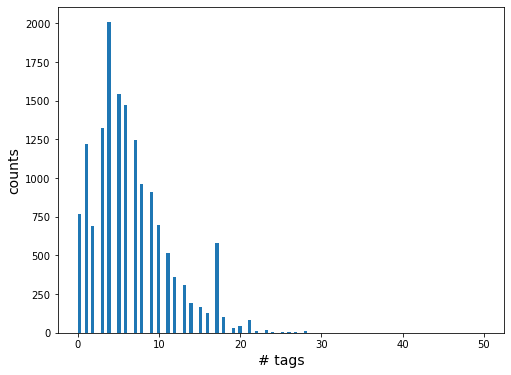

In [17]:
tags_len = []

for meme in memes:
    try:
        tags_len.append(len(meme['tags']))
    except KeyError:
        pass
    
plt.figure(figsize=(8, 6))    
plt.hist(tags_len, bins=int(np.sqrt(len(tags_len))))
plt.xlabel('# tags', fontsize=14)
plt.ylabel('counts', fontsize=14);

Number of tags assigned to meme entries has pretty big variance (from no tags up to 50 tags); the vast majority of meme entries feature 4 tags.

### Search Keywords

Total number of search keywords: 12269

Top 10 most frequent search keywords:
internet            :  556
internet slang      :  371
Western Animation   :  340
Cartoons            :  340
meme                :  330
memes               :  330
trend               :  330
trends              :  330
idea                :  330
nintendo            :  295


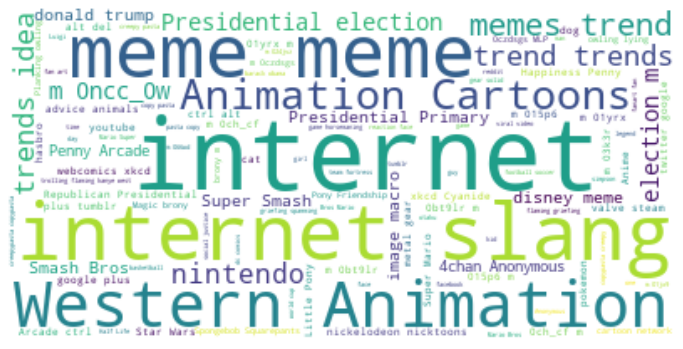

In [18]:
skws = []
for meme in memes:
    try:
        skws += meme['search_keywords']
    except KeyError:
        pass
    
    
skw_counter = Counter()
for kw in skws:
    skw_counter[kw] += 1
    
print('Total number of search keywords:', len(skw_counter))
print('\nTop 10 most frequent search keywords:')
for kw, cnt in skw_counter.most_common(10):
    print(f'{kw:<20}: {cnt:>4}')
    
text = ' '.join(kw for kw in skws)
wordcloud = WordCloud(max_words=len(skws), background_color="white").generate(text)
plt.figure(figsize=(12, 12))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off');

Min # search kws: 1
Max # search kws: 6


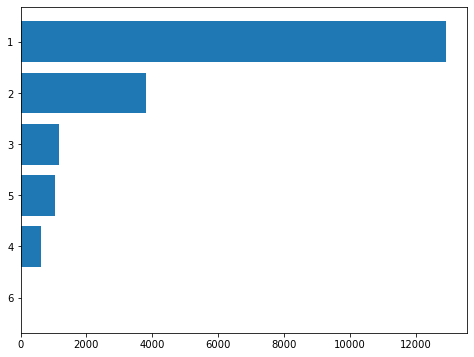

In [19]:
skw_len = []

for meme in memes:
    try:
        skw_len.append(len(meme['search_keywords']))
    except KeyError:
        pass
    
print('Min # search kws:', min(skw_len))
print('Max # search kws:', max(skw_len))

skwlen_counter = {}
for skw in skw_len:
    if skw not in skwlen_counter:
        skwlen_counter[skw] = 0
        
    skwlen_counter[skw] += 1
    
skwlen_counter = dict(sorted(skwlen_counter.items(), key=lambda item: item[1], reverse=True))
  
fig, ax = plt.subplots(figsize=(8, 6))
bars = ax.barh(np.arange(len(skwlen_counter.keys())), skwlen_counter.values(), tick_label=list(skwlen_counter.keys()));
#ax.bar_label(bars, padding=3.)
ax.invert_yaxis();

Most of the meme entries have only one search keyword which is usually the same one as the meme's title. Some of the entries might have up to 6 search keywords.